In [60]:
# Importar librerías esenciales
import pandas as pd
import numpy as np

# Opcional: para visualizaciones futuras
import matplotlib.pyplot as plt
import seaborn as sns

print("Librerías importadas!")

Librerías importadas!


In [61]:
!head -n 55 'sample_data/KOI-test-data-1.csv'

# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
# Sat Oct  4 08:50:09 2025
#
# COLUMN kepid:          KepID
# COLUMN kepoi_name:     KOI Name
# COLUMN koi_disposition: Exoplanet Archive Disposition
# COLUMN koi_pdisposition: Disposition Using Kepler Data
# COLUMN koi_fpflag_nt:  Not Transit-Like False Positive Flag
# COLUMN koi_fpflag_ss:  Stellar Eclipse False Positive Flag
# COLUMN koi_fpflag_co:  Centroid Offset False Positive Flag
# COLUMN koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag
# COLUMN koi_period:     Orbital Period [days]
# COLUMN koi_period_err1: Orbital Period Upper Unc. [days]
# COLUMN koi_period_err2: Orbital Period Lower Unc. [days]
# COLUMN koi_impact:     Impact Parameter
# COLUMN koi_impact_err1: Impact Parameter Upper Unc.
# COLUMN koi_impact_err2: Impact Parameter Lower Unc.
# COLUMN koi_duration:   Transit Duration [hrs]
# COLUMN koi_duration_err1: Transit Duration Upper Unc. [hrs]
# 

In [63]:
df_raw = pd.read_csv('sample_data/KOI-test-data-1.csv', comment='#')

# Ahora sí, tu DataFrame debería cargarse correctamente
print("¡Archivo cargado exitosamente!")
df_raw.head()

¡Archivo cargado exitosamente!


,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2
0,10797460,K00752.01,CONFIRMED,CANDIDATE,0,0,0,0,9.488036,2.775000e-05,...,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061
1,10797460,K00752.02,CONFIRMED,CANDIDATE,0,0,0,0,54.418383,2.479000e-04,...,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061
2,10811496,K00753.01,CANDIDATE,CANDIDATE,0,0,0,0,19.899140,1.494000e-05,...,-176.0,4.544,0.044,-0.176,-0.18,0.30,-0.30,0.868,0.233,-0.078
3,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,...,-174.0,4.564,0.053,-0.168,-0.52,0.30,-0.30,0.791,0.201,-0.067
4,10854555,K00755.01,CONFIRMED,CANDIDATE,0,0,0,0,2.525592,3.761000e-06,...,-211.0,4.438,0.070,-0.210,0.07,0.25,-0.30,1.046,0.334,-0.133


In [64]:
# Lista de columnas para el modelo base y avanzado
columnas_esenciales = [
    'kepid', 'kepoi_name', 'koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
    'koi_fpflag_ec', 'koi_period', 'koi_duration', 'koi_depth',
    'koi_impact', 'koi_model_snr', 'koi_num_transits', 'koi_steff',
    'koi_slogg', 'koi_smet', 'koi_srad', 'koi_ror', 'koi_prad'
]

# Crear un nuevo DataFrame solo con las columnas esenciales
# Usamos .copy() para evitar advertencias de Python
df = df_raw[columnas_esenciales].copy()

print("DataFrame creado con las columnas seleccionadas:")
df.head() # Muestra las primeras 5 filas

DataFrame creado con las columnas seleccionadas:


,kepid,kepoi_name,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_duration,koi_depth,koi_impact,koi_model_snr,koi_num_transits,koi_steff,koi_slogg,koi_smet,koi_srad,koi_ror,koi_prad
0,10797460,K00752.01,CONFIRMED,0,0,0,0,9.488036,2.95750,615.8,0.146,35.8,142.0,5455.0,4.467,0.14,0.927,0.022344,2.26
1,10797460,K00752.02,CONFIRMED,0,0,0,0,54.418383,4.50700,874.8,0.586,25.8,25.0,5455.0,4.467,0.14,0.927,0.027954,2.83
2,10811496,K00753.01,CANDIDATE,0,0,0,0,19.899140,1.78220,10829.0,0.969,76.3,56.0,5853.0,4.544,-0.18,0.868,0.154046,14.60
3,10848459,K00754.01,FALSE POSITIVE,0,1,0,0,1.736952,2.40641,8079.2,1.276,505.6,621.0,5805.0,4.564,-0.52,0.791,0.387394,33.46
4,10854555,K00755.01,CONFIRMED,0,0,0,0,2.525592,1.65450,603.3,0.701,40.9,515.0,6031.0,4.438,0.07,1.046,0.024064,2.75


In [65]:
# Obtener un resumen del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   kepid             9564 non-null   int64  
 1   kepoi_name        9564 non-null   object 
 2   koi_disposition   9564 non-null   object 
 3   koi_fpflag_nt     9564 non-null   int64  
 4   koi_fpflag_ss     9564 non-null   int64  
 5   koi_fpflag_co     9564 non-null   int64  
 6   koi_fpflag_ec     9564 non-null   int64  
 7   koi_period        9564 non-null   float64
 8   koi_duration      9564 non-null   float64
 9   koi_depth         9201 non-null   float64
 10  koi_impact        9201 non-null   float64
 11  koi_model_snr     9201 non-null   float64
 12  koi_num_transits  8422 non-null   float64
 13  koi_steff         9201 non-null   float64
 14  koi_slogg         9201 non-null   float64
 15  koi_smet          9178 non-null   float64
 16  koi_srad          9201 non-null   float64


In [66]:
# Contar los valores en la columna de disposición (nuestro objetivo)
print("Distribución de clases:")
df['koi_disposition'].value_counts()

Distribución de clases:


,count
koi_disposition,
FALSE POSITIVE,4839
CONFIRMED,2746
CANDIDATE,1979


In [67]:
# Calcular el número de valores nulos por columna
print("Valores nulos ANTES de la limpieza:")
print(df.isnull().sum())

# Rellenar los valores nulos en las columnas numéricas con la mediana de cada columna
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].median(), inplace=True)

print("\nValores nulos DESPUÉS de la limpieza:")
print(df.isnull().sum())


Valores nulos ANTES de la limpieza:
kepid                  0
kepoi_name             0
koi_disposition        0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_duration           0
koi_depth            363
koi_impact           363
koi_model_snr        363
koi_num_transits    1142
koi_steff            363
koi_slogg            363
koi_smet             386
koi_srad             363
koi_ror              363
koi_prad             363
dtype: int64

Valores nulos DESPUÉS de la limpieza:
kepid               0
kepoi_name          0
koi_disposition     0
koi_fpflag_nt       0
koi_fpflag_ss       0
koi_fpflag_co       0
koi_fpflag_ec       0
koi_period          0
koi_duration        0
koi_depth           0
koi_impact          0
koi_model_snr       0
koi_num_transits    0
koi_steff           0
koi_slogg           0
koi_smet            0
koi_srad            0
koi_ror             0
koi_prad            0
dtype: int64


/tmp/ipython-input-4281183002.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [68]:
# Filtra el DataFrame para mantener solo las filas con las etiquetas que nos interesan
disposiciones_validas = ['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']
df = df[df['koi_disposition'].isin(disposiciones_validas)]

print("\nDistribución de clases después de filtrar:")
print(df['koi_disposition'].value_counts())


Distribución de clases después de filtrar:
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64


In [69]:
# Guardar el DataFrame limpio a un nuevo archivo
df.to_csv('datos_exoplanetas_limpios.csv', index=False)

print("\n¡Archivo 'datos_exoplanetas_limpios.csv' guardado exitosamente!")


¡Archivo 'datos_exoplanetas_limpios.csv' guardado exitosamente!


In [70]:
!pip install xgboost

transformar datos para que el ML los entienda

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Carga el dataset que limpiaste en el paso anterior
df = pd.read_csv('datos_exoplanetas_limpios.csv')

In [72]:
# 'X' contendrá todas las columnas de características (features)
X = df.drop('koi_disposition', axis=1)

# 'y' contendrá únicamente la columna objetivo (target)
y = df['koi_disposition']

In [73]:
# Inicializa el codificador
le = LabelEncoder()

# Ajusta y transforma la columna 'y'
y_encoded = le.fit_transform(y)

# Es útil guardar las clases para interpretar los resultados después
# Ejemplo de salida: {0: 'CANDIDATE', 1: 'CONFIRMED', 2: 'FALSE POSITIVE'}
label_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print("Mapeo de etiquetas numéricas a originales:")
print(label_mapping)

Mapeo de etiquetas numéricas a originales:
{np.int64(0): 'CANDIDATE', np.int64(1): 'CONFIRMED', np.int64(2): 'FALSE POSITIVE'}


In [74]:
# Dividir los datos: 80% para entrenamiento, 20% para prueba
# stratify=y_encoded asegura que la proporción de cada clase se mantenga en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (7651, 18)
Tamaño del conjunto de prueba: (1913, 18)


MODEL with XGBOOST

In [75]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🧹 Elimina columnas no numéricas o irrelevantes
cols_to_exclude = ["kepid", "kepoi_name"]

X_train = X_train.drop(columns=[c for c in cols_to_exclude if c in X_train.columns])
X_test = X_test.drop(columns=[c for c in cols_to_exclude if c in X_test.columns])

# ⚙️ Inicializa el clasificador XGBoost para problema multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(label_mapping),
    seed=42
)

# 🚀 Entrena el modelo
model.fit(X_train, y_train)

print("¡Modelo entrenado exitosamente!")

¡Modelo entrenado exitosamente!


Evaluar el Rendimiento del Modelo

In [76]:
# El modelo predice las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

In [77]:
# Imprime el reporte con métricas como precisión, recall y f1-score
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=label_mapping.values()))

Reporte de Clasificación:
                precision    recall  f1-score   support

     CANDIDATE       0.82      0.82      0.82       396
     CONFIRMED       0.89      0.89      0.89       549
FALSE POSITIVE       0.99      0.99      0.99       968

      accuracy                           0.93      1913
     macro avg       0.90      0.90      0.90      1913
  weighted avg       0.93      0.93      0.93      1913



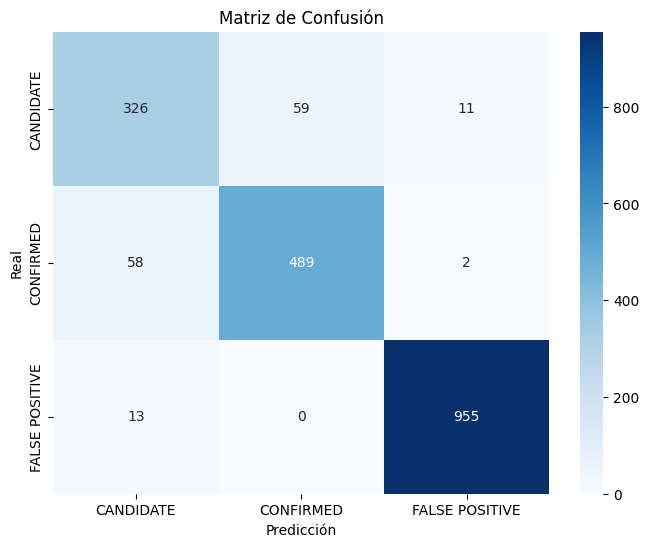

In [78]:
# Genera la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_mapping.values(),
            yticklabels=label_mapping.values())
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

descargar modelo

In [79]:
# import joblib

# Guardar el modelo
# joblib.dump(model, 'exoplanet_model.pkl')
model.save_model('exoplanet_model.json')


In [80]:
# extraer split x_test to csv
X_test.to_csv('x_test.csv', index=False)

X.to_csv('x.csv', index=False)